In [1]:
# matplotlib stuff: plots inline:
%matplotlib inline
# stop autosaving it messes up with git!
%autosave 0
# I dont know what I wanted to do here (some plot optimization with macOS?):
%config InlineBackend.figure_format = 'retina'

import os
CWD = os.getcwd()

# some checks:
assert os.path.isdir(FIGURES_DESTDIR), "There should be a top-level 'tmp' directory in the same directory as the README file), but the directory wasn't found. Did you run the jupyter notebook from within tehjupyter directory?"


# Import utils.py:
# 1. Navigate up until we find a parent directory of the "jupyter" directory: that is the root dir
# to be added to the PYTHONPATH:
import sys
ROOT = CWD
while 'jupyter' not in os.listdir(ROOT):
    ROOT = os.path.dirname(ROOT)
sys.path.append(os.path.dirname(ROOT))
# 2. Import utils.py and reload it (so that we can fixing stuff there does not need notebook reload)
import importlib
from sdaas_eval.jupyter import utils
importlib.reload(utils)
# import all utility functions so that we can call them here directly by name:
from sdaas_eval.jupyter.utils import *
# Setup defaults, print a short doicumentation :
setup()

Autosave disabled


Setting pandas defaults

,Value
display.max_colwidth,500
display.max_columns,500
display.max_rows,25


Setting matplotlib defaults

,Value
figure.figsize,"(6.29922, 6.29922)"
lines.linewidth,1.5
font.size,10
axes.titlesize,10
figure.dpi,300
font.family,sans-serif


`sdaas_eval.jupyter.utils` cheat sheet

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
basename,Returns the final component of a pathname
splitext,Split the extension from a pathname
expanduser,Expand ~ and ~user constructions
isabs,Test whether a path is absolute
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on


In [2]:
clfname = 'clf=IsolationForest&tr_set=uniform_train.hdf&feats=psd@5sec&contamination=auto&max_samples=1024&n_estimators=100&random_state=11.sklmodel'
clf = load_clf(join(ROOT, '_releases', 'classifiers', clfname))
print(clf)

# /Users/rizac/work/gfz/projects/sources/python/sdaas_eval/sdaas_eval/_releases/classifiers/scikit.0.21.3

IsolationForest(max_samples=1024, random_state=11)


In [3]:
from sdaas_eval.core.paths import DATASETS_DIR

columns = ['psd@5sec', # 'window_type', 'hand_labelled', 
           'station_id', 'event_time', 'location_code',
           'channel_code', 'magnitude', 'distance_km']

dbname2dataset = {
'dbpath_me': pd.read_hdf(join(DATASETS_DIR, 'me_at_rz_minus_vm258.hdf'), columns=columns),
'dbpath_eu_new': pd.read_hdf(join(DATASETS_DIR, 's2s_2019_03_at_rs5.hdf'), columns=columns)
}

printhtml('Done')

Done

In [8]:
dataset = dbname2dataset['dbpath_eu_new']
dataset = dataset[(dataset.channel_code=='HNN') & (dataset.location_code != '')]

display(dataset[['event_time', 'magnitude']])

,event_time,magnitude
956,2015-05-11 08:26:29,4.5
957,2015-05-11 08:26:29,4.5
962,2015-01-02 06:16:30,4.4
963,2015-01-02 06:16:30,4.4
968,2015-01-03 13:05:20,4.1
...,...,...
1269,2018-10-10 07:21:27,2.8
1274,2019-01-27 07:56:05,2.9
1275,2019-01-27 07:56:05,2.9
1280,2019-02-05 02:19:32,2.9


In [4]:
# Channels were retrieved from:
# file:///~/Nextcloud/<user>/old/plot.misclassified.allset_train_test-CSV-MagNrg.html


from stream2segment.process.db import Event  # not used

seedid2dbname = {
    'TM.PRAC..BHZ': 'dbpath_me',
    # 'IV.PIO1..HNN': 'dbpath_eu_new',
    # 'FR.ESCA.00.HNN': 'dbpath_eu_new',
    #'FR.ESCA.00.HNE': 'dbpath_eu_new', 
    'KO.KCTX..HHE': 'dbpath_eu_new',
    'II.BORG.10.BHZ': 'dbpath_me',
}

In [6]:
printhtml('<h4>Finding the station ids of the given channels</h4>')
start, end = datetime(1910, 1, 1), datetime(2020, 1, 1)
for nslc, db_name in seedid2dbname.items():
    
    printhtml('')
    printhtml('')
    printhtml(f'Searching station id in db "{db_name}" for {nslc}')
    sta_ids = None
    net, sta, loc, cha = nslc.split('.')
    with dbsession(db_name) as session:
        dataset = dbname2dataset[db_name]
        dataset = dataset[(dataset.location_code == loc) & 
                          (dataset.channel_code == cha)]
        # print('Connecting: %s' % session)
        staids2print = 6
        for (seg_id, e_time, e_mag) in session.query(Segment.id, Event.time, Event.magnitude).\
            join(Segment.event).\
                filter((Segment.data_seed_id == nslc) &
                       (Segment.request_start >=start) &
                       (Segment.request_end <= end)):

            sta_ids_tmp = set(dataset[(dataset.event_time == e_time) &
                                      (dataset.magnitude == e_mag)].station_id)
            # if not len(sta_ids_tmp):
            #    continue

            if sta_ids is None:
                sta_ids = sta_ids_tmp
            else:
                # merge, but if no intersection is found, keep old sta_ids:
                sta_ids_tmp = sta_ids & sta_ids_tmp
                if sta_ids_tmp:
                    sta_ids = sta_ids_tmp

            if len(sta_ids) <= staids2print:
                staids2print = 0
                printhtml(f'Candidate station ids: {sta_ids}')
                break
            # print(f'{len(sta_ids_tmp)} {len(sta_ids)}')

            # if len(sta_ids) == 1:
            #    seedid2stationid[nslc] = list(sta_ids)[0]
            # if len(sta_ids) <= 1:
            #    break
    # printhtml(f'Station id for {nslc}: {seedid2stationid.get(nslc, None)}')
        # ok now plot:

Finding the station ids of the given channels

Searching station id in db "dbpath_me" for TM.PRAC..BHZ

/Users/rizac/work/gfz/projects/sources/python/sdaas_eval/.env/py3.9.1/lib/python3.9/site-packages/sqlalchemy/orm/relationships.py:3435: SAWarning: relationship 'Station.segments' will copy column stations.id to column channels.station_id, which conflicts with relationship(s): 'Station.channels' (copies stations.id to channels.station_id), 'Channel.station' (copies stations.id to channels.station_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  util.warn(
/Users/rizac/work/gfz/projects/sources/python/sdaas_eval/.env/py3.9.1/lib/python3.9/site-packages/sqlalchemy/orm/relationships.py:3435: SAWarning: relationship 'Statio

Candidate station ids: {802, 3179, 3507, 3510}

Searching station id in db "dbpath_eu_new" for FR.ESCA.00.HNN

Candidate station ids: set()

Searching station id in db "dbpath_eu_new" for KO.KCTX..HHE

Candidate station ids: {3707}

Searching station id in db "dbpath_me" for II.BORG.10.BHZ

Candidate station ids: {833, 840, 749, 527, 560}

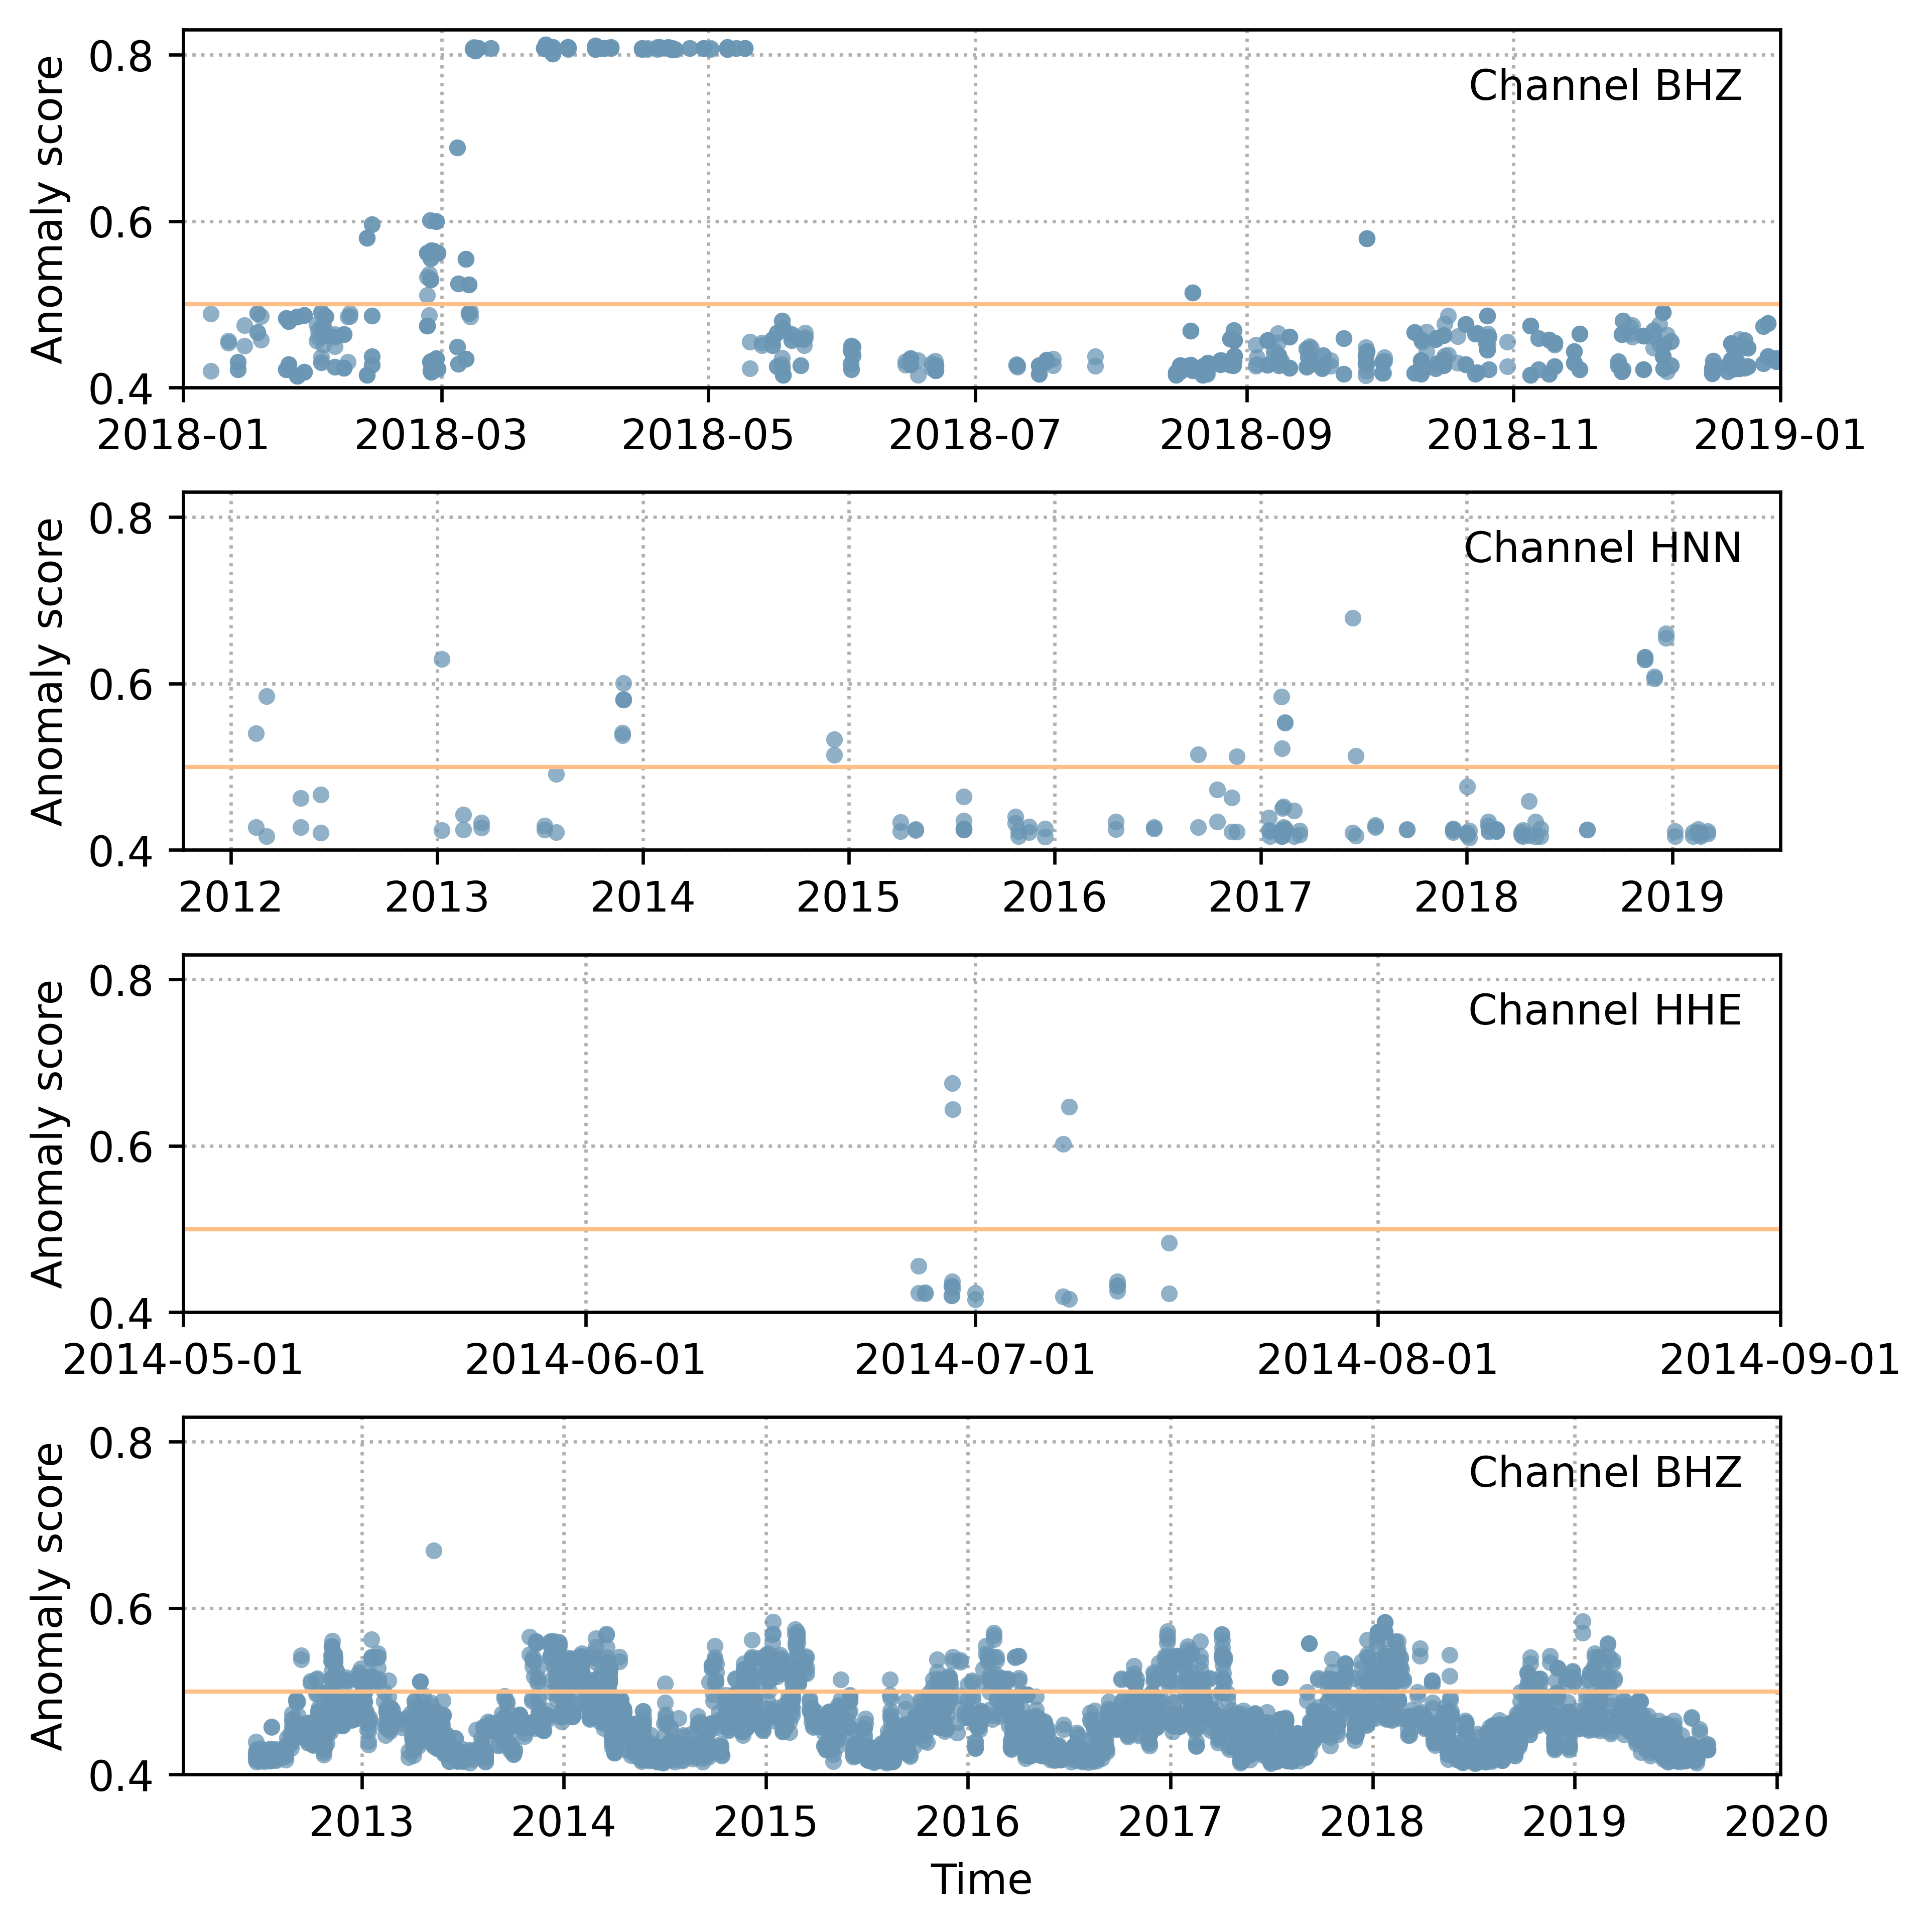

In [71]:
seedid2dbname['...HNN'] = 'dbpath_eu_new'
seedid2dbname['..00.HHE'] = 'dbpath_eu_new'
seedid2dbname['...HHE'] = 'dbpath_eu_new'

colors = get_colors(3)

seedid2stationid = {
    'TM.PRAC..BHZ': (3179, datetime(2018, 1, 1), datetime(2019, 1, 1)),
    '...HNN': (3996, None, None),
    #'..00.HHE': (2502, datetime(2007, 6, 1), datetime(2008, 1, 1)),
    '...HHE': (8301, datetime(2014, 5, 1), datetime(2014, 9, 1)),
    'II.BORG.10.BHZ': (527, None, None),
}

fig = plt.figure(constrained_layout=True)
gsp = fig.add_gridspec(len(seedid2stationid), 1, hspace=0,
                       height_ratios = [1,1,1,1])  # .5,1,1,1,1])  # width_ratios=[1,5], hspace=0)
axss = []


for i, (nslc, (sta_id, start, end)) in enumerate(seedid2stationid.items()):
    ax = fig.add_subplot(gsp[i, 0])
    net, sta, loc, cha = nslc.split('.')
    db_name = seedid2dbname[nslc]
    dataset = dbname2dataset[db_name]
    dataset = dataset[(dataset.location_code ==loc) & (dataset.channel_code == cha) & (dataset.station_id == sta_id)]
    if start is not None:
        dataset = dataset[dataset['event_time'] >= start]
        ax.set_xlim(left=start)
    if end is not None:
        dataset = dataset[dataset['event_time'] <= end]
        ax.set_xlim(right=end)
    # set ticks if timespan too short (matplotlib messes up things):
    if start and end and end-start < timedelta(days=365):
        ticks = [datetime(start.year, start.month, 1)]
        while ticks[-1] < end:
            if ticks[-1].month == 12:
                year, month = ticks[-1].year + 1, 1
            else:
                year, month = ticks[-1].year, ticks[-1].month + 1
            ticks.append(datetime(year, month, 1))
        ax.set_xticks(ticks)

    dataset = dataset[~pd.isna(dataset['psd@5sec'])]
    psd5sec = dataset[['psd@5sec']].values
    if len(psd5sec):
        scores = -clf.score_samples(psd5sec)
        ax.scatter(dataset.event_time, scores, marker='.', s=64, facecolor=list(colors[0]) + [0.75],
                   edgecolor=colors[0], linewidth=0, label=f'Channel {nslc.split(".")[-1]}')
    ax.axhline(0.5, c=colors[-2], ls='-', lw=1)
    ax.set_ylim([0.4, 0.83])
    # ax.set_title(f'Channel {nslc.split(".")[-1]}')
    ax.legend(markerscale=0, frameon=False)  # dont show the marker on the legend
    ax.grid(True, ls=':')
    ax.set_axisbelow(True)
    ax.set_ylabel('Anomaly score')
    if i == len(seedid2stationid) -1:
        ax.set_xlabel('Time')



In [75]:
dest = join(CWD, '_img', 'outlierspaper-img008.jpg')
assert isdir(dirname(dest))
savefig(fig, dest)

Saving figure to "/Users/rizac/work/gfz/projects/sources/python/sdaas_eval/sdaas_eval/jupyter/paper2021/figures/_img/outlierspaper-img008.jpg"

dpi: 300.0 width: 6.30 height: 6.30)

True